In [ ]:
!source ~/.venvs/spotify_project/bin/activate

In [ ]:
!pip3 install spotipy matplotlib numpy pandas

In [99]:
client_id = ""
client_secret = ""

In [3]:

import spotipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:

# Get the song attributes for each song
def get_audio_features(track_ids):
    limit = 50
    result_items = []
    for start in range(0, len(track_ids), limit):
        response = sp.audio_features(track_ids[start : start + limit])
        #print(response)
        result_items.extend([{
            'track_id': item['id'],
            'acousticness': item['acousticness'],
            'danceability': item['danceability'],
            'energy': item['energy'],
            'instrumentalness': item['instrumentalness'],
            'liveness': item['liveness'],
            'speechiness': item['speechiness'],
            'mode': item['mode'],
            'valence': item['valence'],
            'key': item['key'],
            'loundness': item['loudness'],
            'mode': item['mode'],
            'tempo':item['tempo']
        } for item in response if item is not None])

    return pd.DataFrame(data=result_items)

def get_genre_songs(genre, offset):
  search_results = sp.search(q="genre:" + genre, type="track", limit=50, offset=offset)
  return ({
        'track_id': item['id'],
        'track_name': item['name'],
        'track_artist': item['artists'][0]['name'],
        'track_popularity': item['popularity'],
        'duration_ms': item['duration_ms'],
        'album_name': item['album']['name'],
        'release_date': item['album']['release_date']
    } for item in search_results["tracks"]["items"])

In [5]:

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

redirect_url = "https://oauth.pstmn.io/v1/browser-callback"
cache_path = ".cache"
# Create a Spotify object
sp = spotipy.Spotify(auth_manager=spotipy.oauth2.SpotifyOAuth(client_id, client_secret, redirect_url,cache_path = cache_path))

In [6]:
sp

In [7]:
# # Define top 10 genres
# top_10_genres = ["pop", "rock", "hip-hop", "rap", "country", "jazz", "rnb"]

final_df = pd.DataFrame()  # Empty dataframe to store results


# for genre in top_10_genres:
#     print(f"Fetching songs for genre: {genre}")
#     tracks = []
#     offset = 0
    
#     # Retrieving 1000 songs for the genre
#     while len(tracks) < 100:
#         tracks.extend(get_genre_songs(genre, 50))
#         offset += 50

#     tracks_df = pd.DataFrame(data=tracks)

#     # Create a dataframe with the song attributes and the genre
#     df1 = get_audio_features(tracks_df['track_id'])
#     df1["genre"] = genre

#     merged_df = pd.merge(tracks_df, df1, on="track_id", how="outer")

#     final_df = pd.concat([final_df, merged_df])

# print(final_df)

In [8]:
# genre = "pop"
d=[]
top_10_genres = ["pop", "rock", "hip-hop", "rap", "country", "jazz"]

for genre in top_10_genres:
    # Create a list to store the song IDs
    tracks = []
    #df = pd.DataFrame(columns=["track_id", "track_name", "artist_name", "popularity", "duration_ms"])
    # Search for songs using the genre
    offset = 0
    while offset < 1000:

        #search_results = sp.search(q="genre:" + genre, type="track", limit=50, offset=0)
        tracks.extend(get_genre_songs(genre, offset))
        offset += 50

    tracks_df = pd.DataFrame(data=tracks)

    # Create a dataframe with the song attributes and the genre
    df1 = get_audio_features(tracks_df['track_id'])
    df1["genre"] = genre

    merged_df = pd.merge(tracks_df, df1, on="track_id", how="outer")
    # print(merged_df.head())
    final_df[genre]=merged_df.to_json()
    d.append(merged_df.to_json())


In [21]:
x=pd.DataFrame(d)

In [22]:
x.head()


,0
0,"{""track_id"":{""0"":""2IGMVunIBsBLtEQyoI1Mu7"",""1"":..."
1,"{""track_id"":{""0"":""5XeFesFbtLpXzIVDNQP22n"",""1"":..."
2,"{""track_id"":{""0"":""741UUVE2kuITl0c6zuqqbO"",""1"":..."
3,"{""track_id"":{""0"":""4iZ4pt7kvcaH6Yo8UoZ4s2"",""1"":..."
4,"{""track_id"":{""0"":""59uQI0PADDKeE6UZDTJEe8"",""1"":..."


In [30]:
import json

In [97]:
# x[0][1]


In [98]:
js=json.loads(x[0][0])
js

In [33]:
js.keys()

dict_keys(['track_id', 'track_name', 'track_artist', 'track_popularity', 'duration_ms', 'album_name', 'release_date', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'mode', 'valence', 'key', 'loundness', 'tempo', 'genre'])

In [54]:
c=0
li=[pd.DataFrame(json.loads(d[i])) for i in range(6)]
lens=[len(d[i]) for i in range(6)]


In [55]:
lens

[287117, 288944, 286498, 282092, 288119, 296260]

In [52]:
combined_df = pd.concat([pd.DataFrame(json.loads(d[i])) for i in range(6)], ignore_index=True)

In [53]:
combined_df

,track_id,track_name,track_artist,track_popularity,duration_ms,album_name,release_date,acousticness,danceability,energy,instrumentalness,liveness,speechiness,mode,valence,key,loundness,tempo,genre
0,2IGMVunIBsBLtEQyoI1Mu7,Paint The Town Red,Doja Cat,99,231750,Paint The Town Red,2023-08-04,0.269,0.868,0.538,0.000003,0.0901,0.1740,1,0.732,5,-8.603,99.968,pop
1,6IPwKM3fUUzlElbvKw2sKl,we fell in love in october,girl in red,91,184153,we fell in love in october / October Passed Me By,2018-11-21,0.113,0.566,0.366,0.181000,0.1550,0.0280,1,0.237,7,-12.808,129.960,pop
2,1xK59OXxi2TAAAbmZK0kBL,Romantic Homicide,d4vd,91,132630,Romantic Homicide,2022-07-20,0.453,0.571,0.544,0.008050,0.3220,0.0299,1,0.216,6,-10.613,132.052,pop
3,4iZ4pt7kvcaH6Yo8UoZ4s2,Snooze,SZA,92,201800,SOS,2022-12-09,0.141,0.559,0.551,0.000000,0.1100,0.1320,1,0.392,5,-7.231,143.008,pop
4,741UUVE2kuITl0c6zuqqbO,Barbie World (with Aqua) [From Barbie The Album],Nicki Minaj,91,109750,Barbie World (with Aqua) [From Barbie The Album],2023-06-23,0.519,0.770,0.580,0.000127,0.2330,0.2470,1,0.753,0,-8.393,144.072,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,45muf22QzSyKwsF4l3IcwJ,Searching,Roy Ayers,52,240920,Vibrations,1976,0.535,0.468,0.760,0.000008,0.0912,0.0529,0,0.472,4,-7.304,168.963,jazz
6030,3wGFjYS1fK00Pv1Ajydua4,You Bring Me Joy,Anita Baker,49,264773,Sweet Love,2022-02-14,0.173,0.485,0.497,0.000004,0.1070,0.0307,1,0.185,9,-7.225,66.506,jazz
6031,1yxcKrEcxt4O03IIC25yHk,Winter Wonderland,Tony Bennett,60,133213,Snowfall: The Tony Bennett Christmas Album,1968-10-06,0.871,0.453,0.453,0.000000,0.2180,0.0395,1,0.586,3,-9.354,116.098,jazz
6032,1eHGsCdAWh1Ffowzacpfoi,Candela,Buena Vista Social Club,63,327866,Buena Vista Social Club,1997-06-23,0.719,0.525,0.619,0.000168,0.2890,0.0354,1,0.814,9,-12.322,101.045,jazz


In [57]:
combined_df.describe()

,track_popularity,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,speechiness,mode,valence,key,loundness,tempo
count,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000,6034.000000
mean,72.204839,215409.382831,0.275389,0.618326,0.602343,0.057706,0.178645,0.100631,0.655618,0.481905,5.121644,-7.686575,120.587245
std,14.690344,61728.335607,0.298511,0.150987,0.213439,0.196355,0.135113,0.105863,0.475206,0.232230,3.582439,3.822127,29.983519
min,0.000000,32762.000000,0.000005,0.000000,0.005900,0.000000,0.021000,0.000000,0.000000,0.000000,0.000000,-29.289000,0.000000
25%,69.000000,178639.500000,0.031900,0.515000,0.466000,0.000000,0.098300,0.034800,0.000000,0.297000,2.000000,-9.140000,95.967000
50%,75.000000,209213.000000,0.144000,0.618000,0.628000,0.000002,0.125000,0.049800,1.000000,0.475000,5.000000,-6.701000,120.122000
75%,80.000000,243086.000000,0.463000,0.727000,0.764000,0.000353,0.216000,0.118750,1.000000,0.659000,8.000000,-5.119250,140.141750
max,100.000000,941360.000000,0.995000,0.973000,0.996000,0.972000,0.964000,0.737000,1.000000,0.985000,11.000000,0.352000,220.099000


In [56]:
combined_df.to_csv("mix_genre_songs_df")

In [58]:
df,merged_df=combined_df.copy(),combined_df.copy()

In [59]:
import seaborn as sns

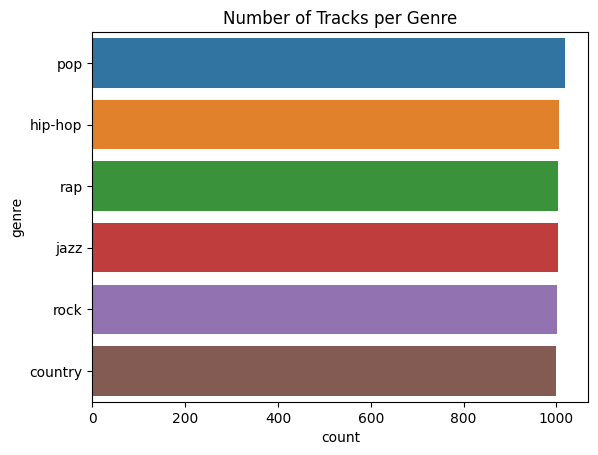

In [60]:
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Number of Tracks per Genre')
plt.show()

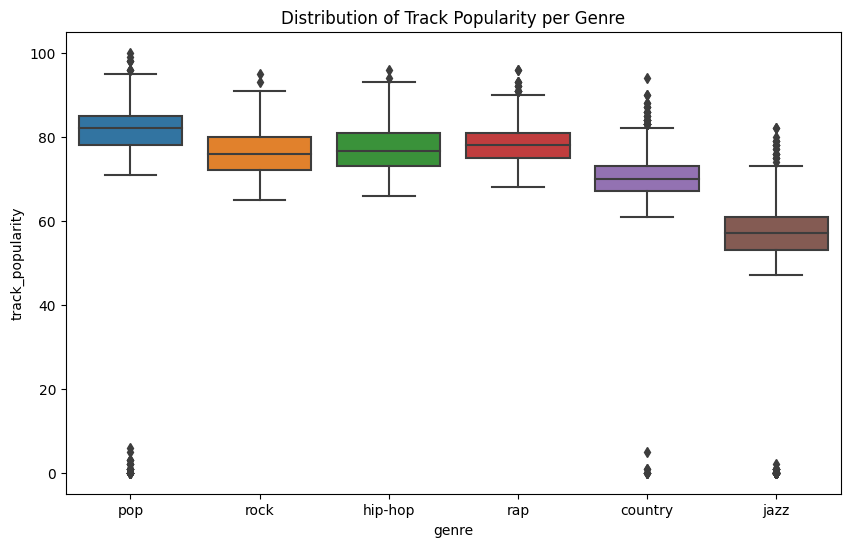

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='track_popularity', data=df)
plt.title('Distribution of Track Popularity per Genre')
plt.show()


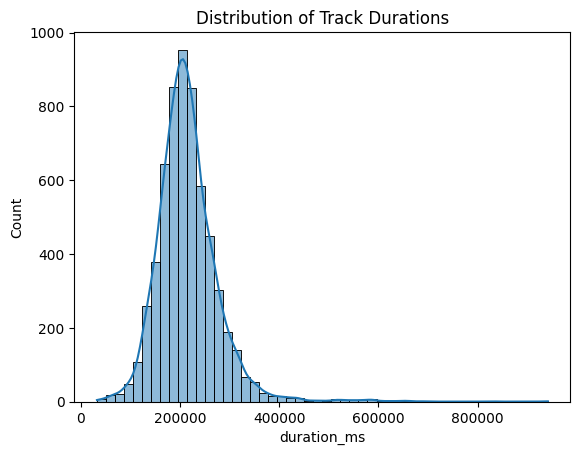

In [62]:
sns.histplot(df['duration_ms'], bins=50, kde=True)
plt.title('Distribution of Track Durations')
plt.show()

/var/folders/wq/j88bl0zd4nl_pg7wc5l_q0_h0000gn/T/ipykernel_23418/4118007523.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.drop(columns=['track_id', 'track_name', 'track_artist', 'album_name', 'release_date']).corr()


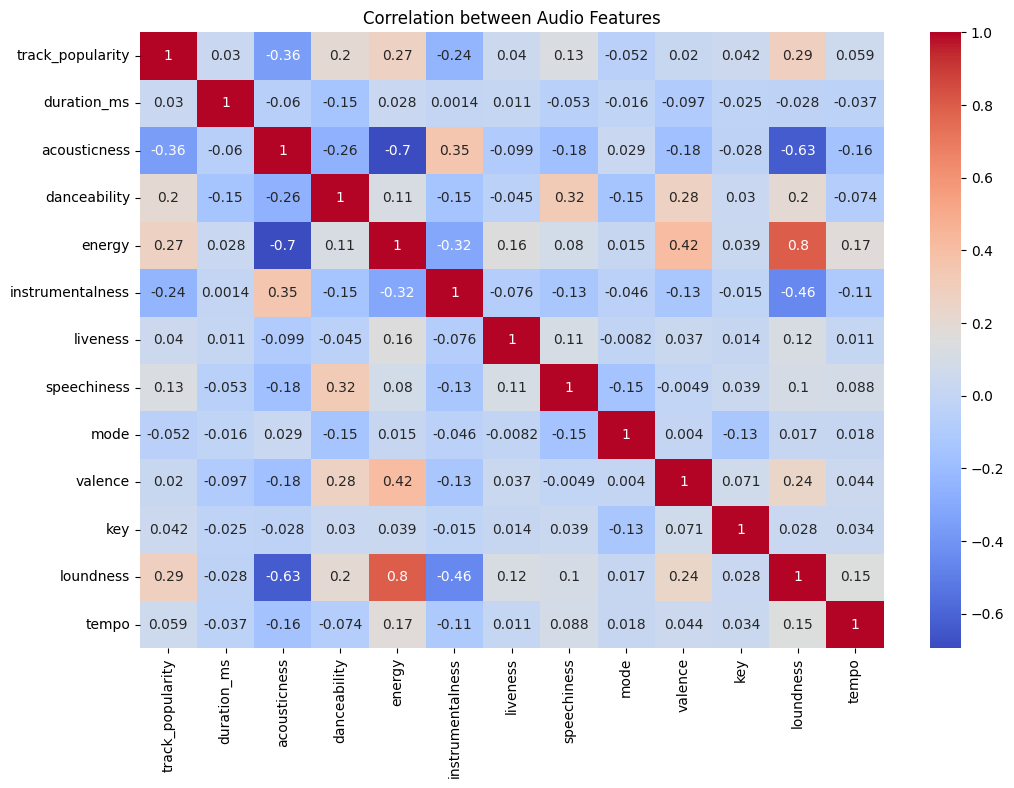

In [63]:
correlation = df.drop(columns=['track_id', 'track_name', 'track_artist', 'album_name', 'release_date']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Audio Features')
plt.show()

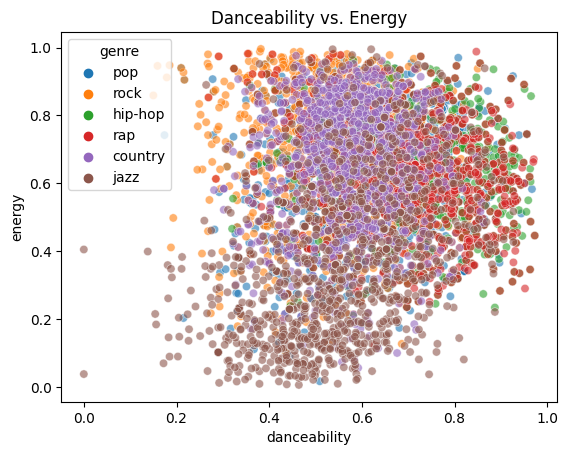

In [64]:
sns.scatterplot(x='danceability', y='energy', hue='genre', data=df, alpha=0.6)
plt.title('Danceability vs. Energy')
plt.show()

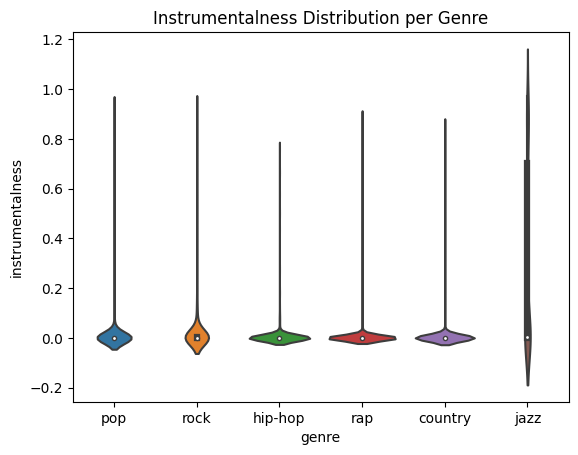

In [65]:
sns.violinplot(x='genre', y='instrumentalness', data=df)
plt.title('Instrumentalness Distribution per Genre')
plt.show()


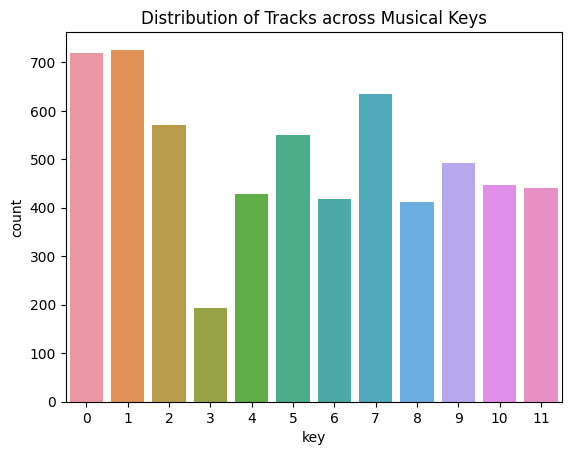

In [66]:
sns.countplot(x='key', data=df)
plt.title('Distribution of Tracks across Musical Keys')
plt.show()

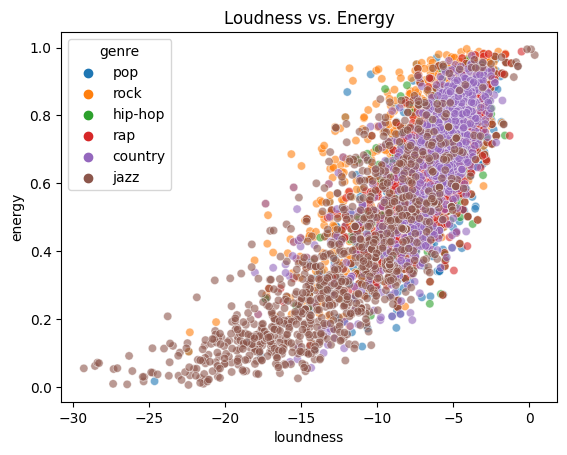

In [67]:
sns.scatterplot(x='loundness', y='energy', hue='genre', data=df, alpha=0.6)
plt.title('Loudness vs. Energy')
plt.show()


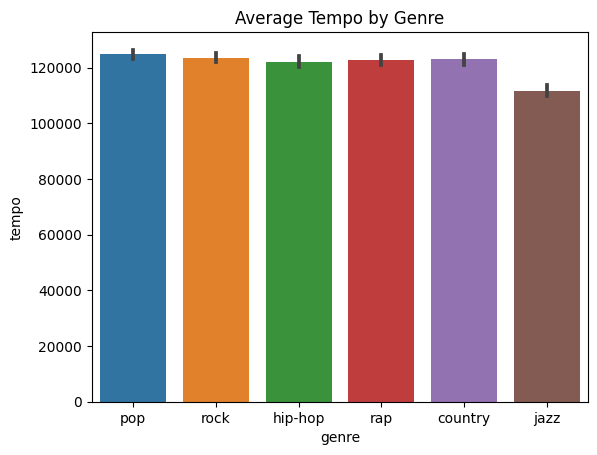

In [68]:
sns.barplot(x='genre', y='tempo', data=df, estimator=sum)
plt.title('Average Tempo by Genre')
plt.show()


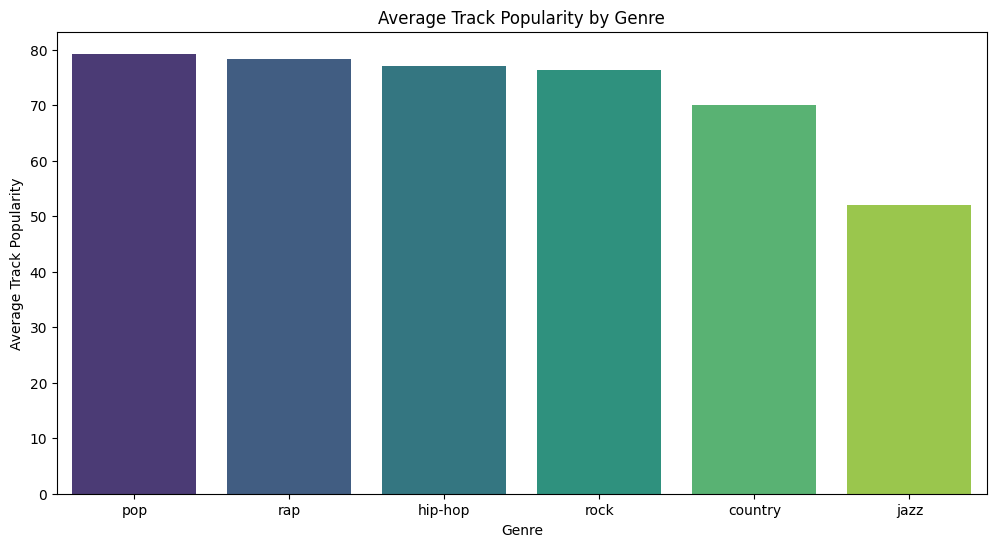

In [70]:
# Group by genre and take the mean popularity
genre_popularity = df.groupby('genre')['track_popularity'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values, palette='viridis')
plt.title('Average Track Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Track Popularity')
plt.show()

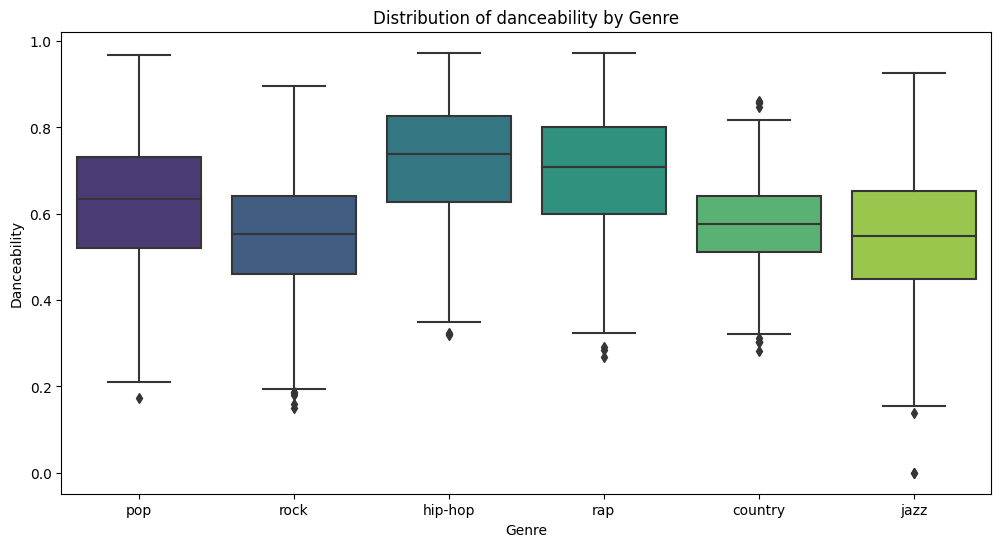

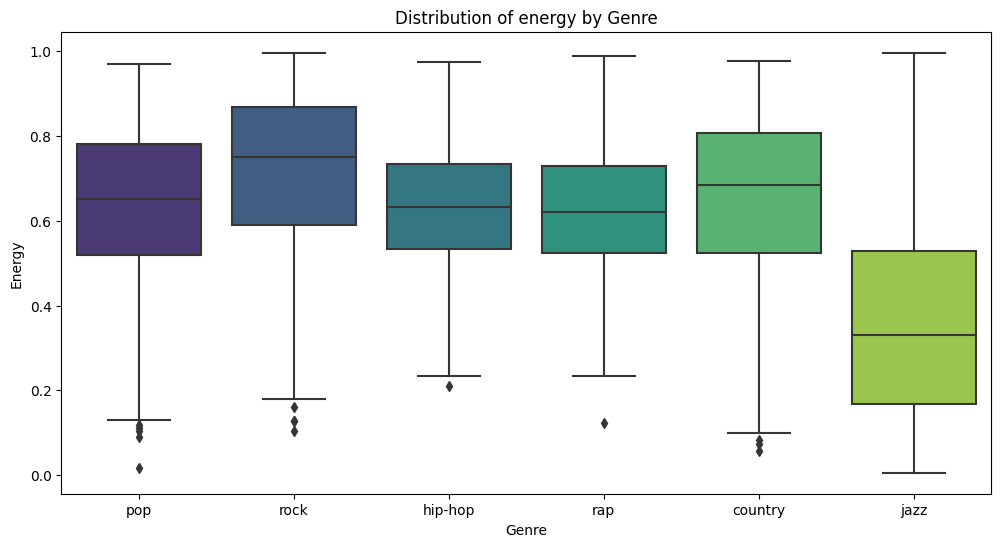

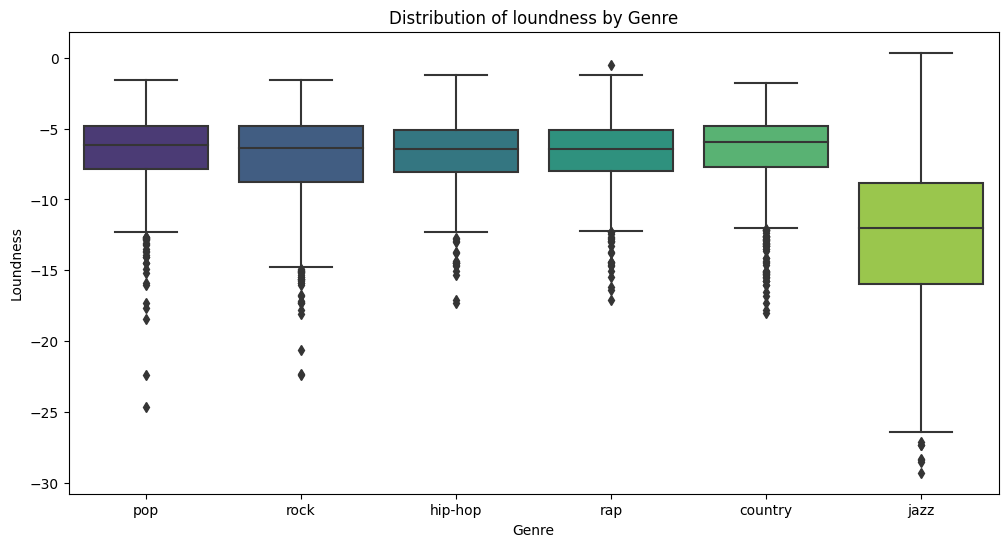

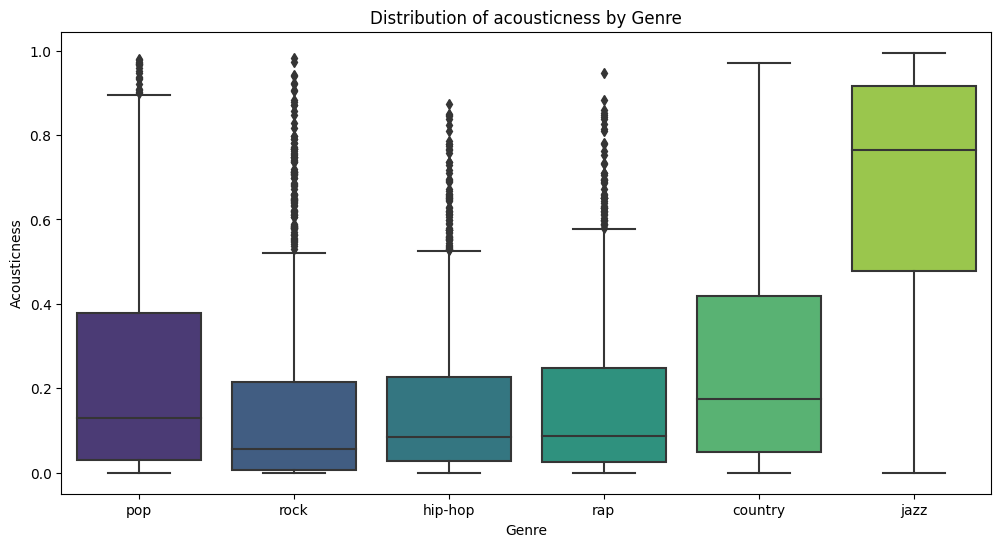

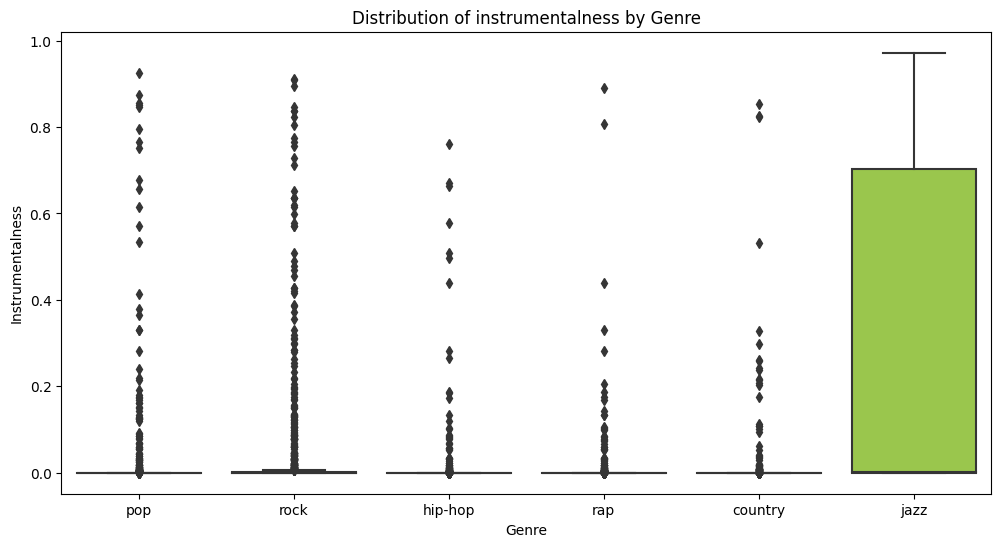

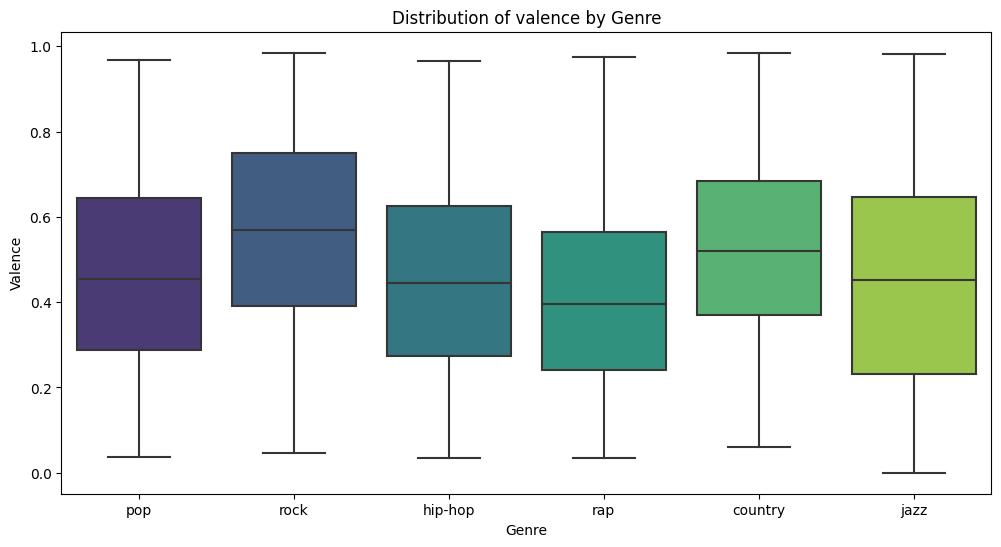

In [72]:
features = ['danceability', 'energy', 'loundness', 'acousticness', 'instrumentalness', 'valence']

for feature in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='genre', y=feature, data=df, palette='viridis')
    plt.title(f'Distribution of {feature} by Genre')
    plt.xlabel('Genre')
    plt.ylabel(feature.capitalize())
    plt.show()


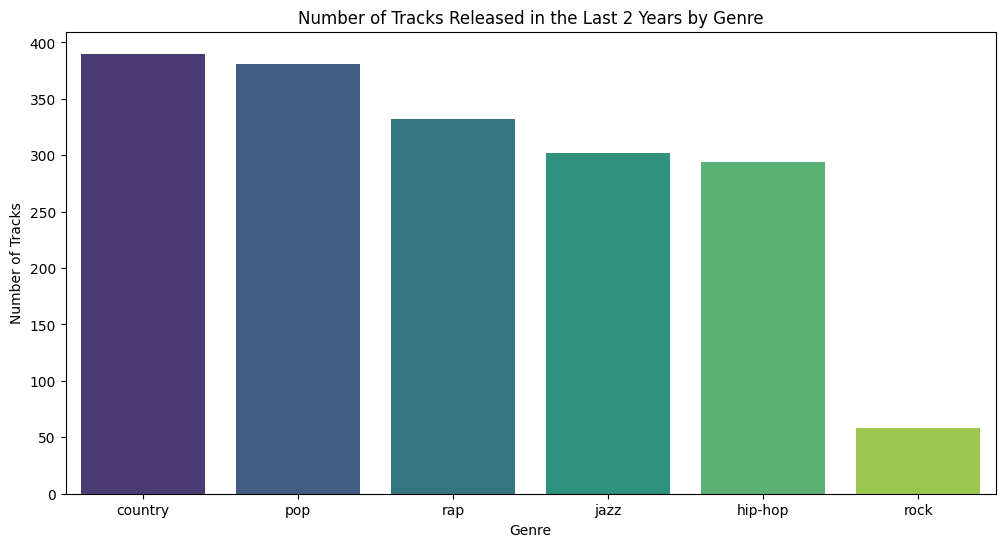

In [73]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Filter tracks released in the last 2 years
recent_tracks = df[df['release_date'] > '2021-01-01']

# Count by genre
recent_genre_counts = recent_tracks['genre'].value_counts()

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=recent_genre_counts.index, y=recent_genre_counts.values, palette='viridis')
plt.title('Number of Tracks Released in the Last 2 Years by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.show()


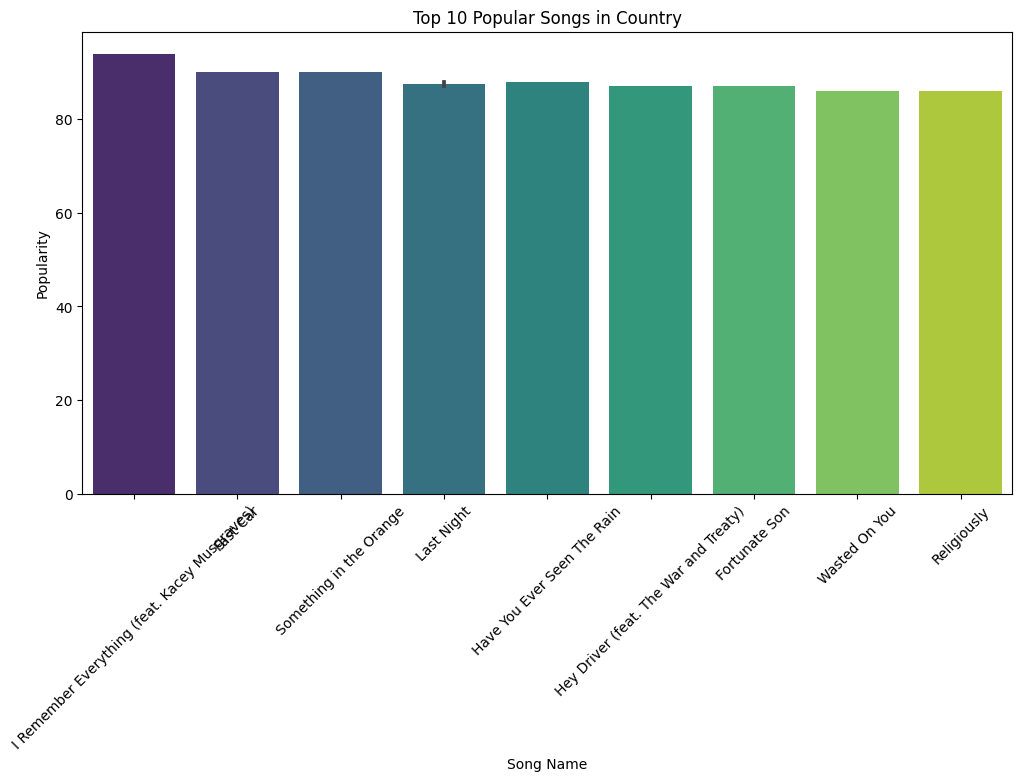

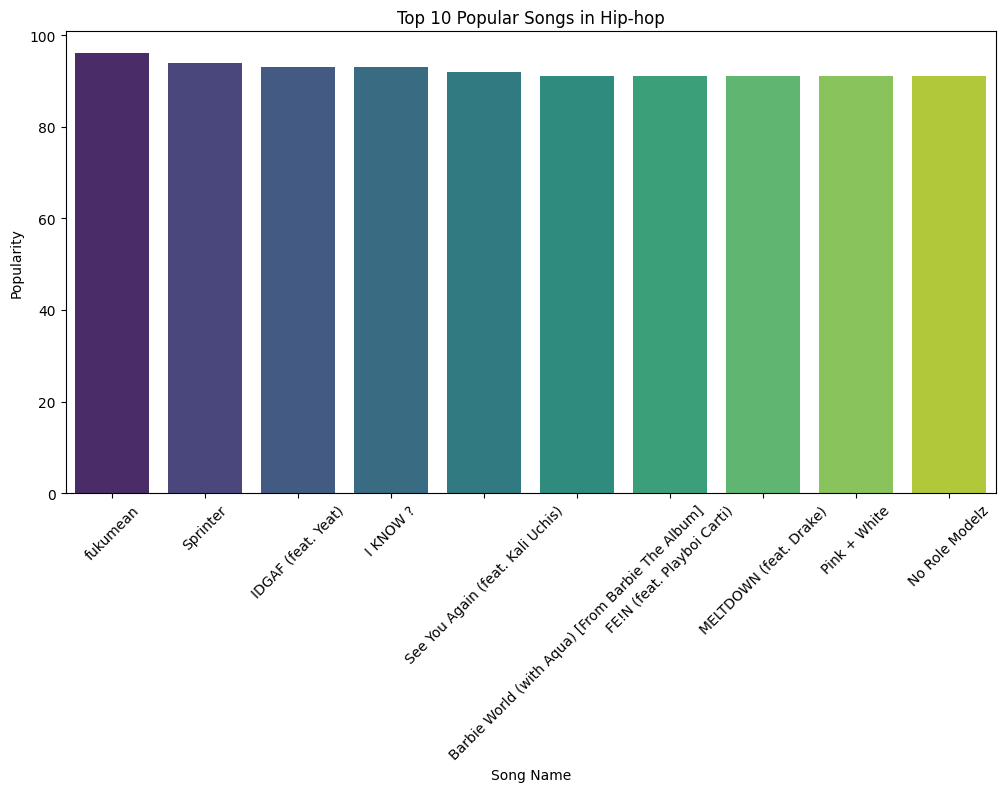

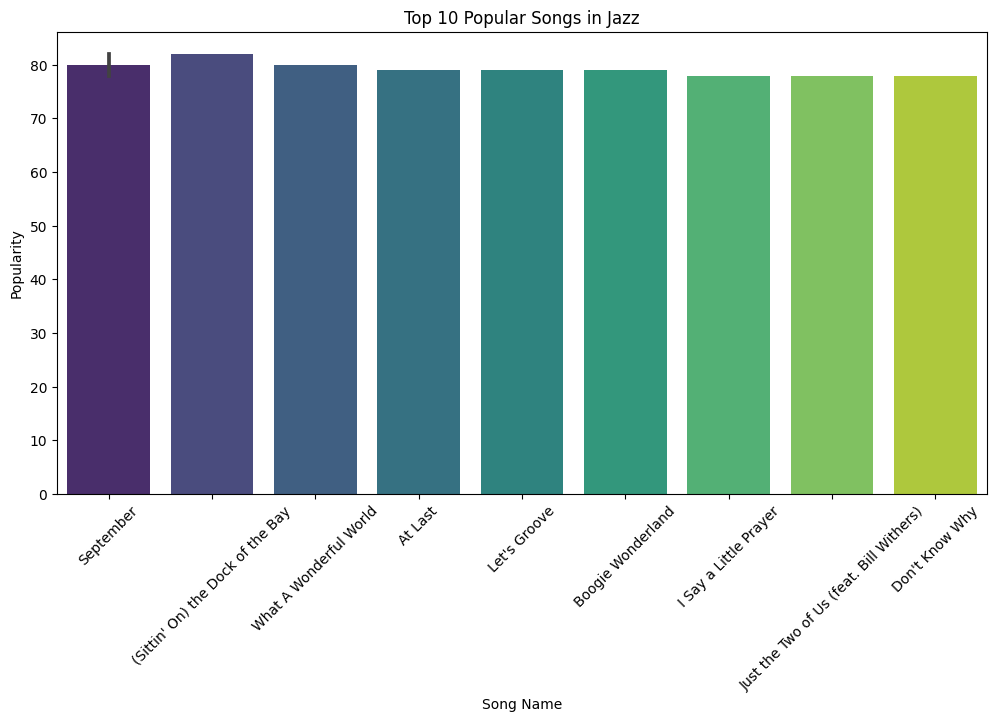

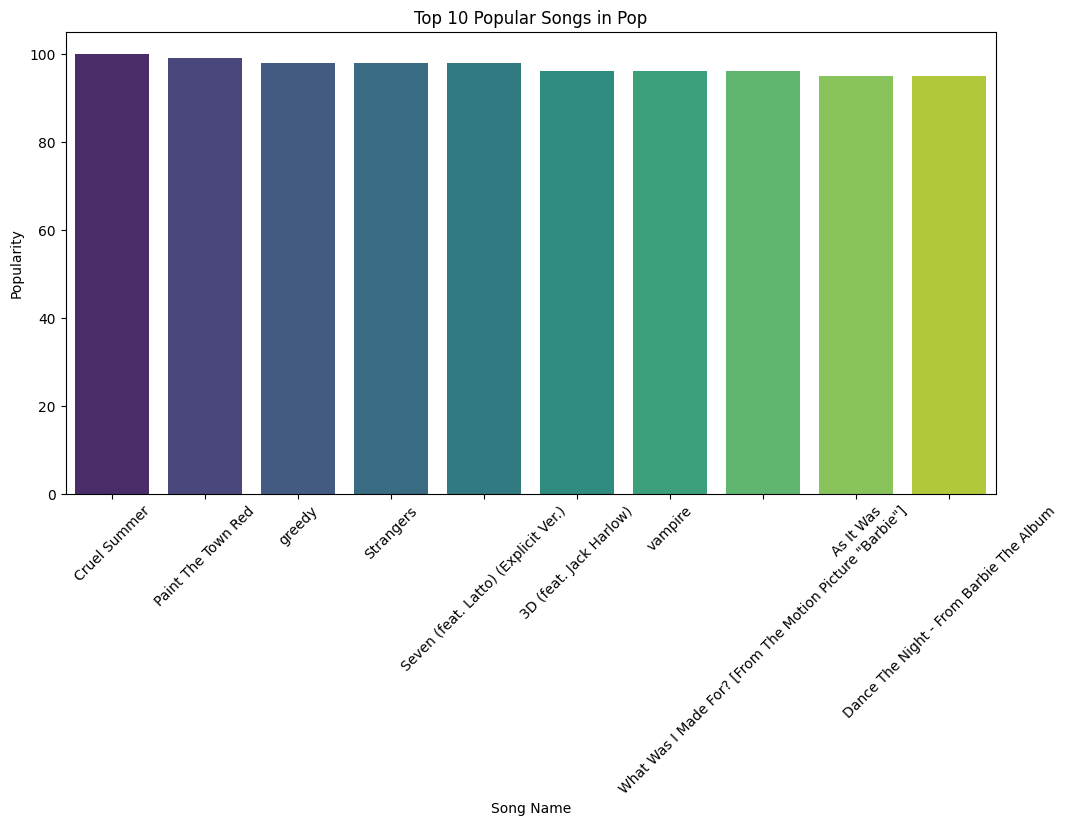

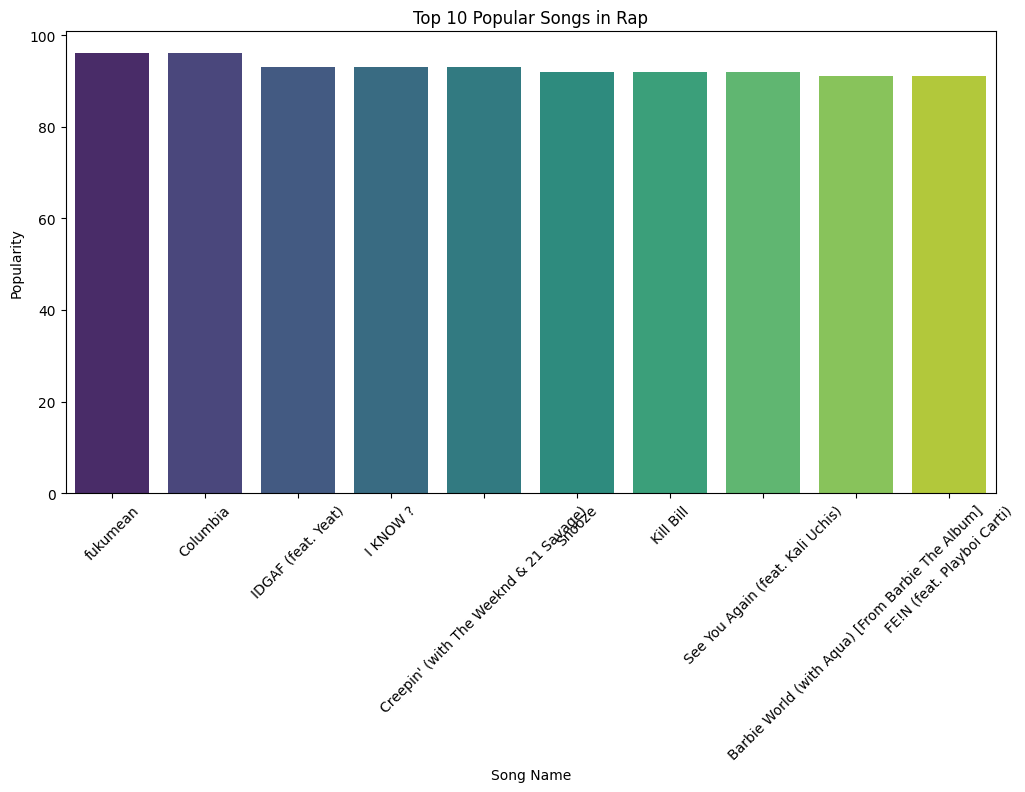

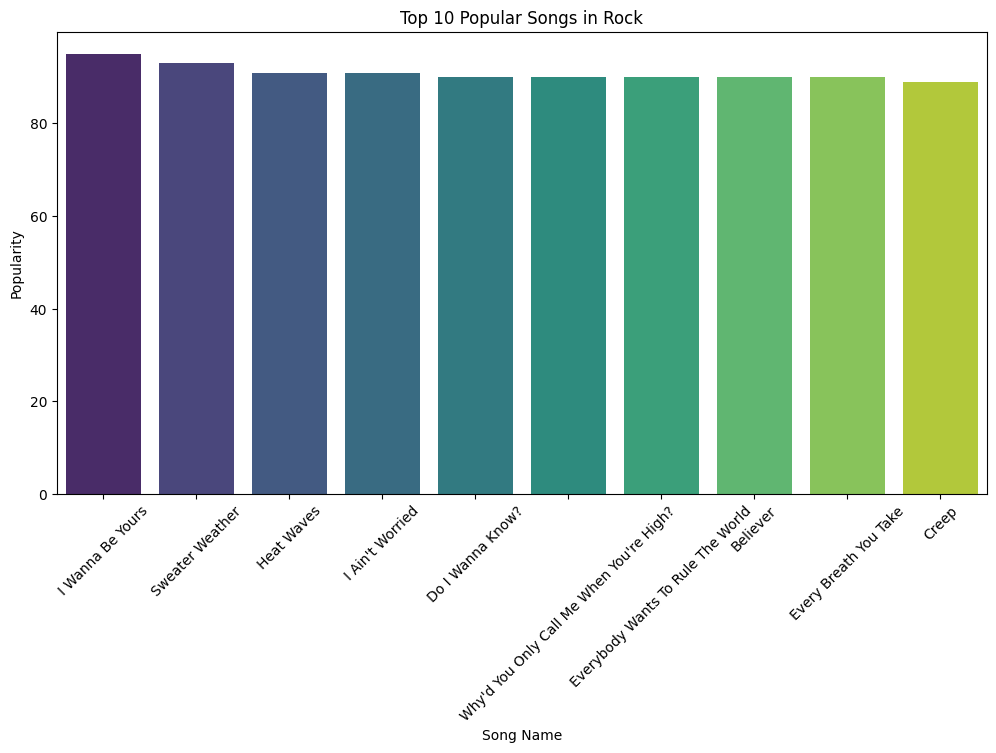

In [74]:
# Top 10 most popular songs per genre
top_songs_per_genre = combined_df.groupby('genre').apply(lambda x: x.nlargest(10, 'track_popularity')).reset_index(drop=True)

# Plotting top songs for each genre
for genre in top_songs_per_genre['genre'].unique():
    subset = top_songs_per_genre[top_songs_per_genre['genre'] == genre]
    plt.figure(figsize=(12,6))
    sns.barplot(x='track_name', y='track_popularity', data=subset, palette='viridis')
    plt.title(f'Top 10 Popular Songs in {genre.capitalize()}')
    plt.xlabel('Song Name')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)
    plt.show()


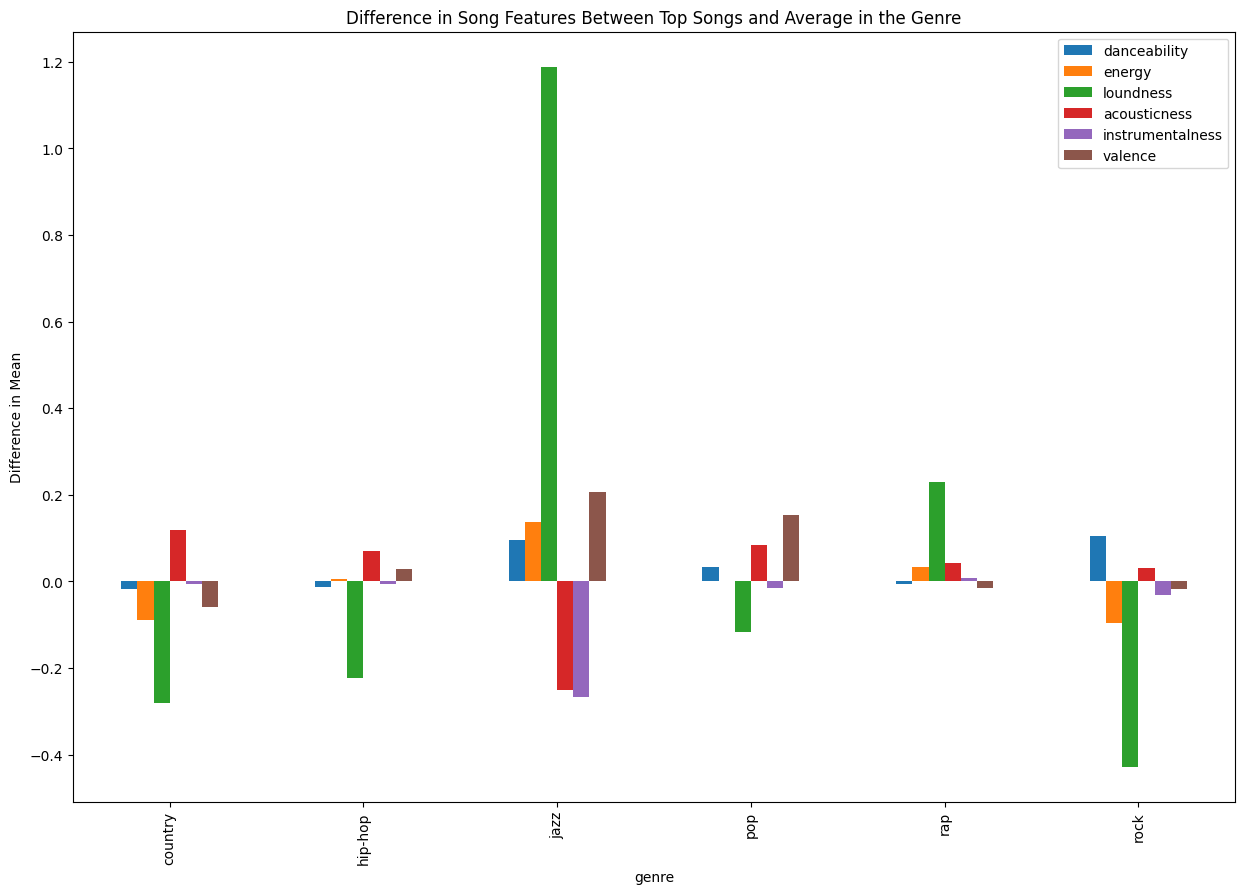

In [75]:
features_mean = combined_df.groupby('genre')[features].mean()
features_top_mean = top_songs_per_genre.groupby('genre')[features].mean()

difference = features_top_mean - features_mean

# Plotting
difference.plot(kind='bar', figsize=(15,10))
plt.title('Difference in Song Features Between Top Songs and Average in the Genre')
plt.ylabel('Difference in Mean')
plt.show()


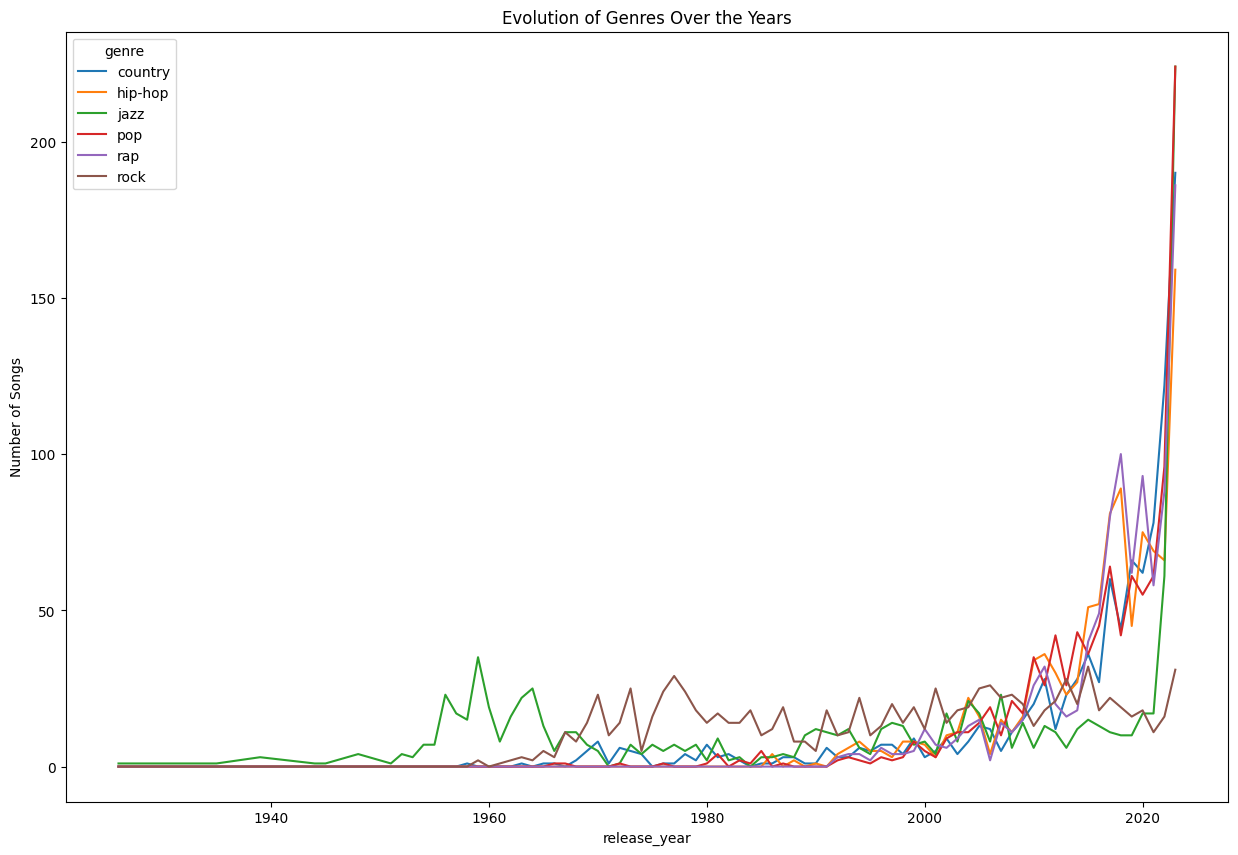

In [77]:
# Extracting year from release_date
df['release_year'] = df['release_date'].dt.year

yearly_counts = df.groupby(['release_year', 'genre']).size().unstack().fillna(0)

# Plotting
yearly_counts.plot(kind='line', figsize=(15,10))
plt.title('Evolution of Genres Over the Years')
plt.ylabel('Number of Songs')
plt.show()


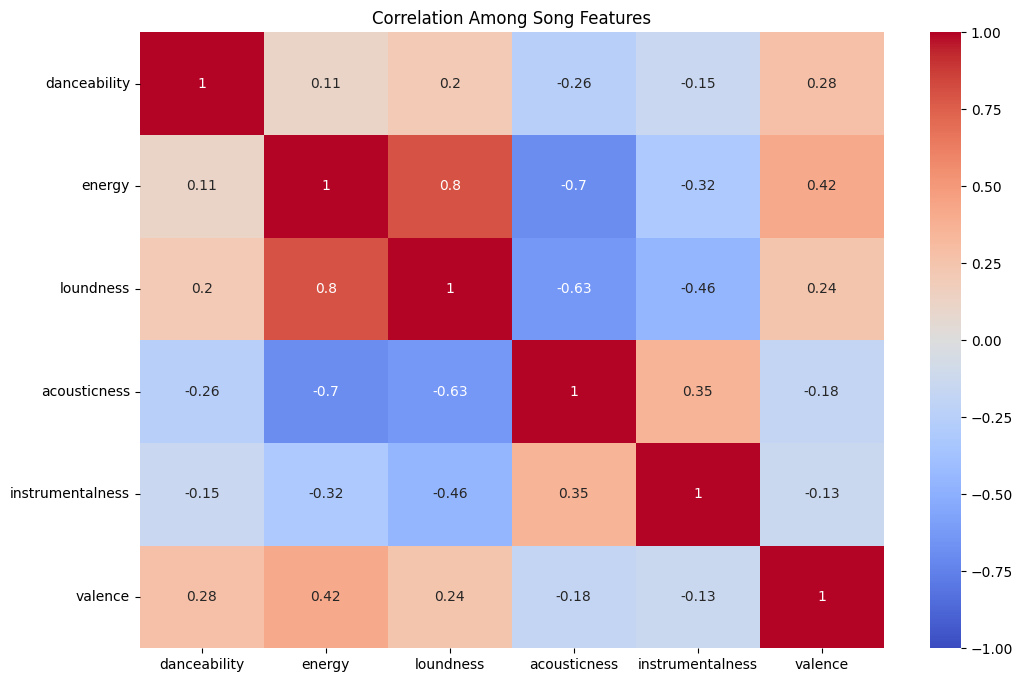

In [78]:
correlation_matrix = df[features].corr()

# Plotting
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Among Song Features')
plt.show()


In [81]:
!pip3 install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 32.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.5 MB/s eta 0:00:00


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting data
X = combined_df[features]
y = combined_df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Metrics
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 9.661735621152875


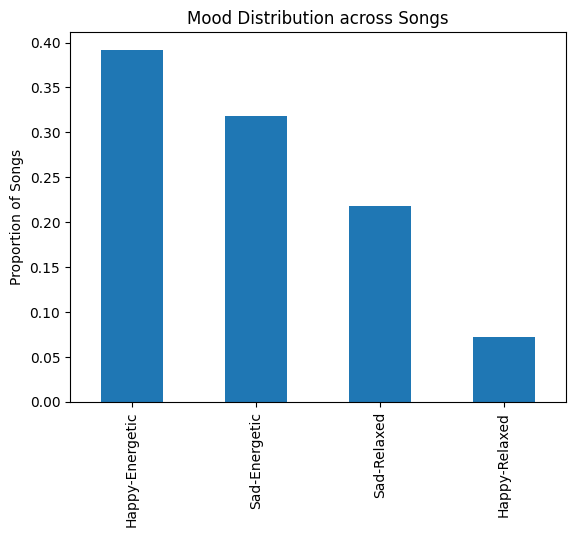

In [85]:
def categorize_mood(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return 'Happy-Energetic'
    elif row['valence'] > 0.5 and row['energy'] <= 0.5:
        return 'Happy-Relaxed'
    elif row['valence'] <= 0.5 and row['energy'] > 0.5:
        return 'Sad-Energetic'
    else:
        return 'Sad-Relaxed'

combined_df['mood'] = combined_df.apply(categorize_mood, axis=1)
mood_distribution = combined_df['mood'].value_counts(normalize=True)

# Plotting
mood_distribution.plot(kind='bar')
plt.title('Mood Distribution across Songs')
plt.ylabel('Proportion of Songs')
plt.show()


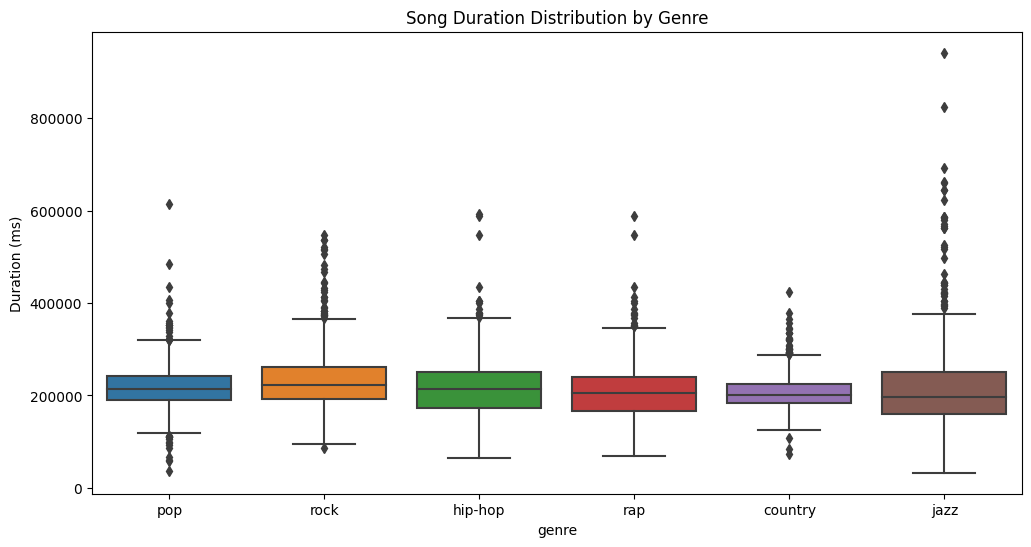

In [86]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='duration_ms', data=combined_df)
plt.title('Song Duration Distribution by Genre')
plt.ylabel('Duration (ms)')
plt.show()


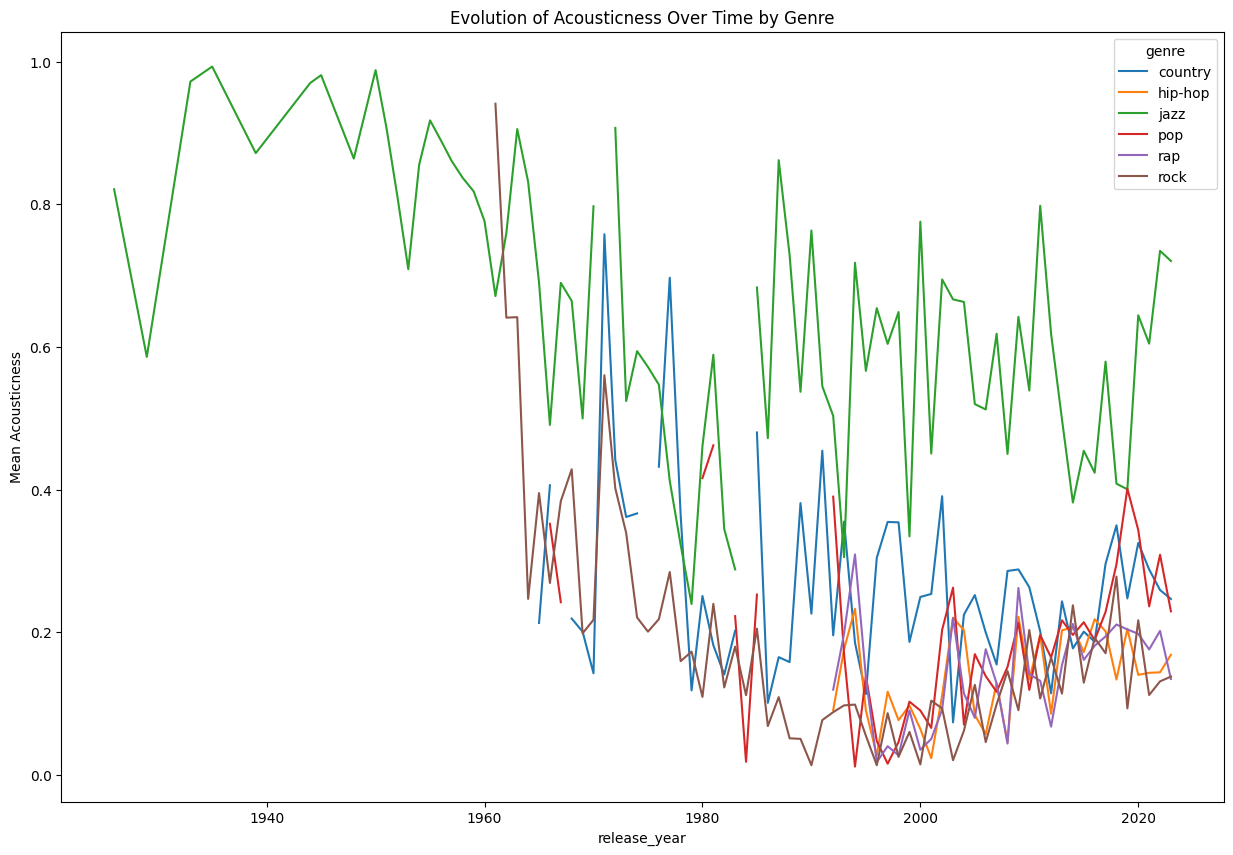

In [88]:
acoustic_trend = df.groupby(['release_year', 'genre'])['acousticness'].mean().unstack()

# Plotting
acoustic_trend.plot(figsize=(15,10))
plt.title('Evolution of Acousticness Over Time by Genre')
plt.ylabel('Mean Acousticness')
plt.show()


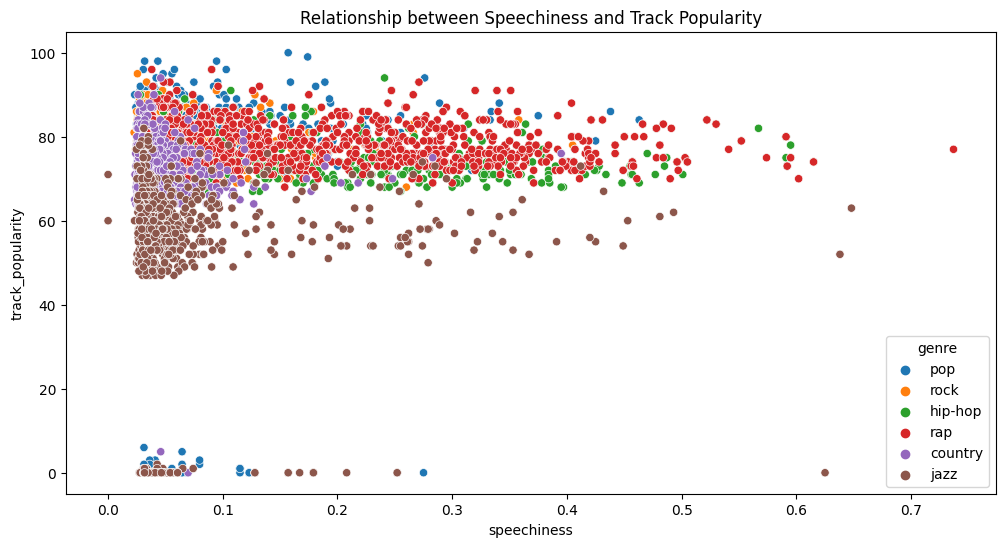

In [89]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='speechiness', y='track_popularity', hue='genre', data=combined_df)
plt.title('Relationship between Speechiness and Track Popularity')
plt.show()


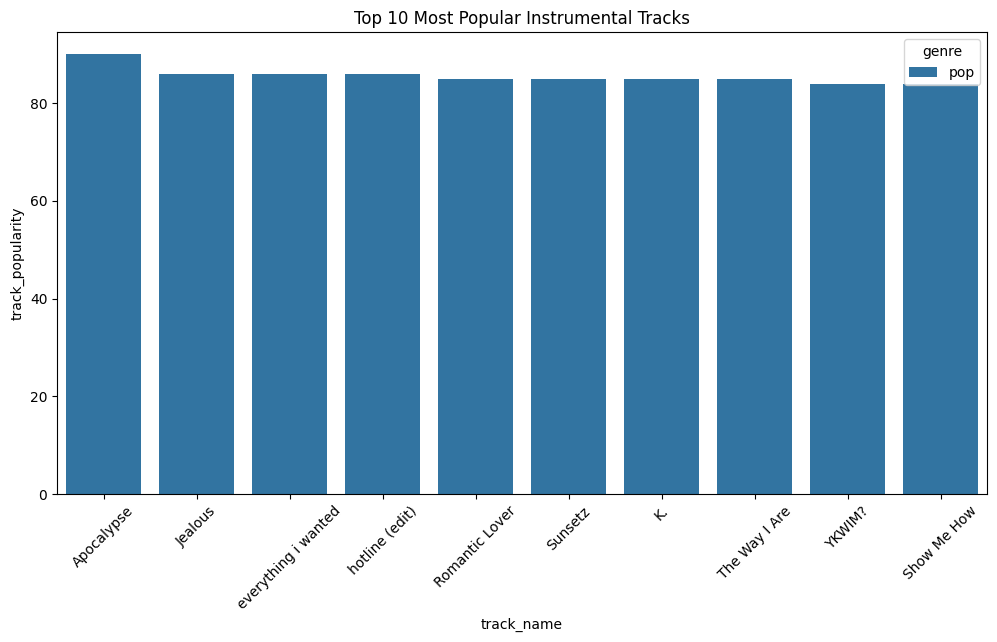

In [90]:
instrumental_df = combined_df[combined_df['instrumentalness'] > 0.5]
most_popular_instrumental = instrumental_df.nlargest(10, 'track_popularity')

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='track_name', y='track_popularity', data=most_popular_instrumental, hue='genre', dodge=False)
plt.title('Top 10 Most Popular Instrumental Tracks')
plt.xticks(rotation=45)
plt.show()


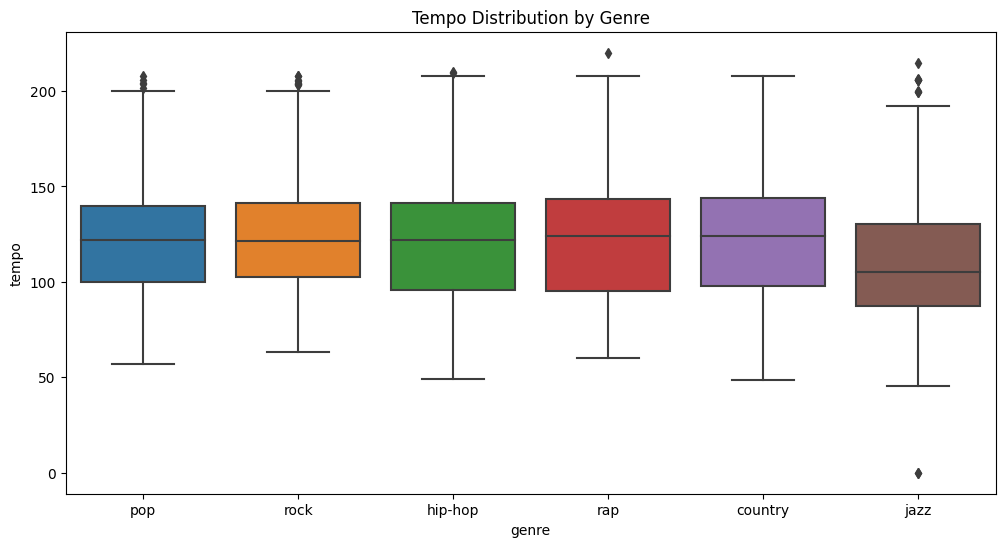

In [91]:
plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='tempo', data=combined_df)
plt.title('Tempo Distribution by Genre')
plt.show()


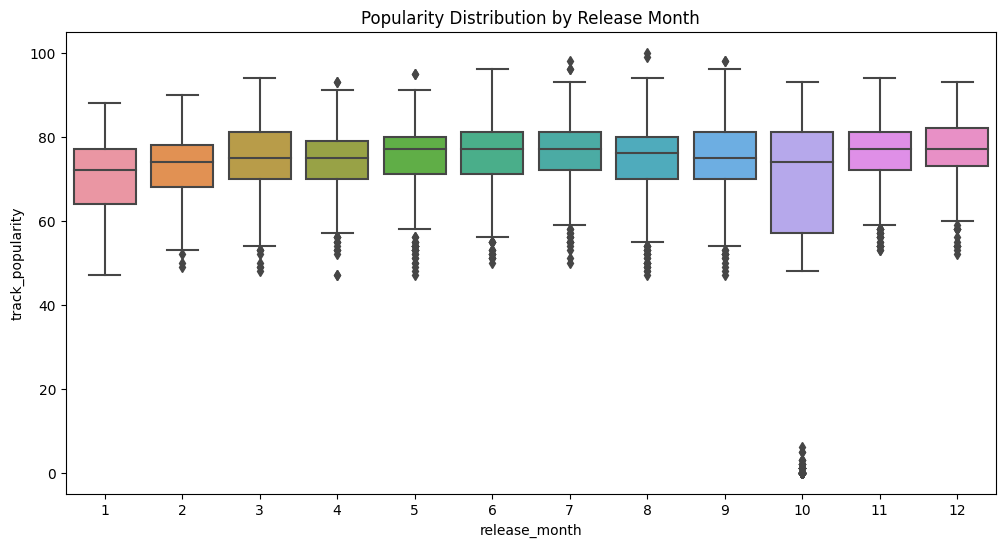

In [96]:
# Extracting month from the release date
combined_df['release_month'] = df['release_date'].dt.month

plt.figure(figsize=(12,6))
sns.boxplot(x='release_month', y='track_popularity', data=combined_df)
plt.title('Popularity Distribution by Release Month')
plt.show()




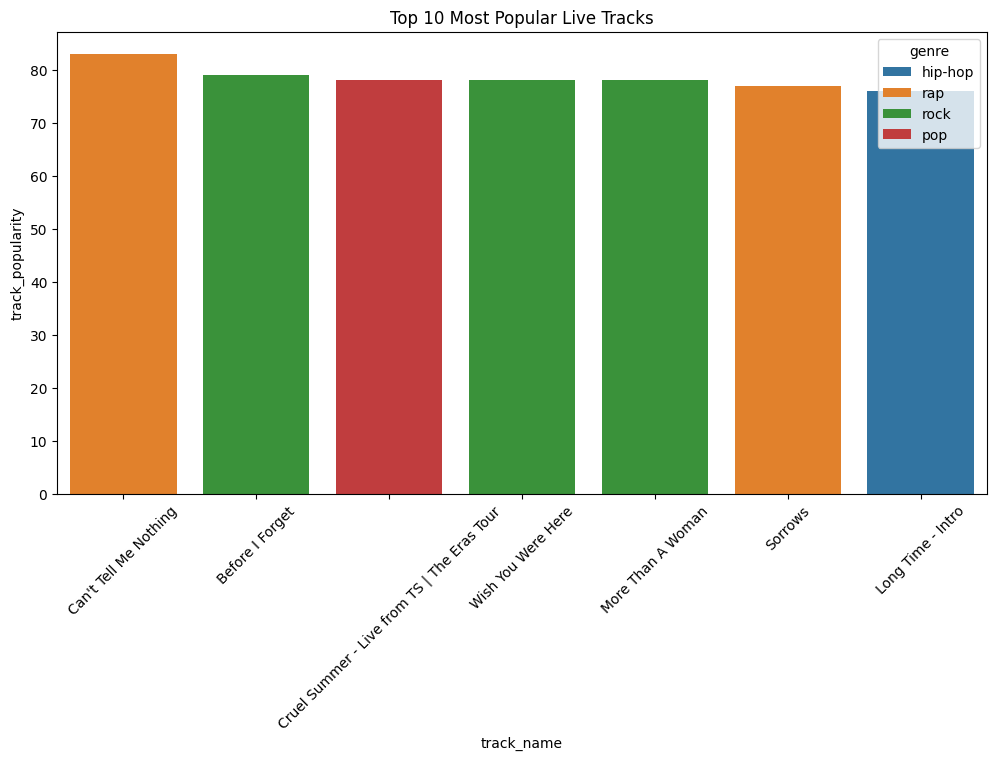

In [94]:
live_df = combined_df[combined_df['liveness'] > 0.8]
most_popular_live = live_df.nlargest(10, 'track_popularity')

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x='track_name', y='track_popularity', data=most_popular_live, hue='genre', dodge=False)
plt.title('Top 10 Most Popular Live Tracks')
plt.xticks(rotation=45)
plt.show()

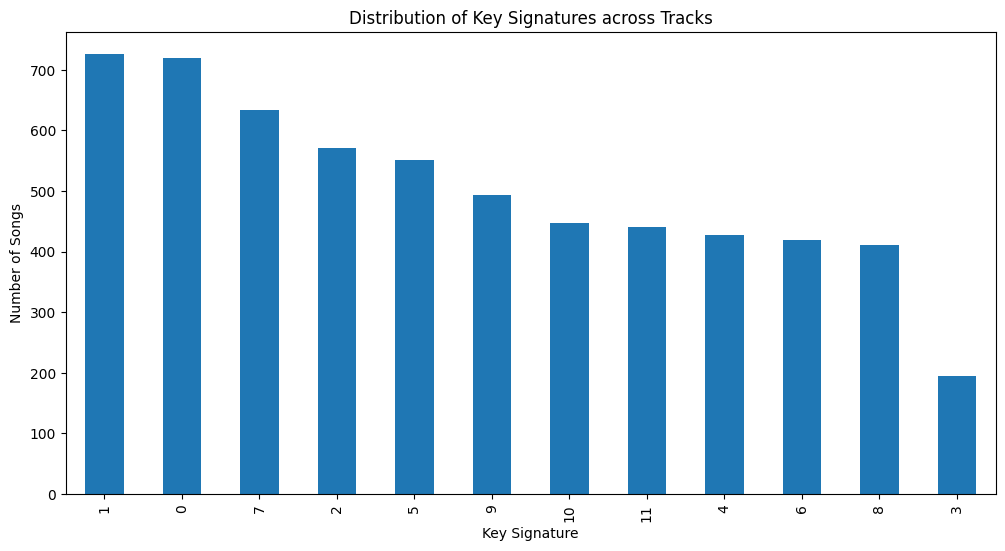

In [93]:
key_counts = combined_df['key'].value_counts()

# Plotting
key_counts.plot(kind='bar', figsize=(12,6))
plt.title('Distribution of Key Signatures across Tracks')
plt.ylabel('Number of Songs')
plt.xlabel('Key Signature')
plt.show()


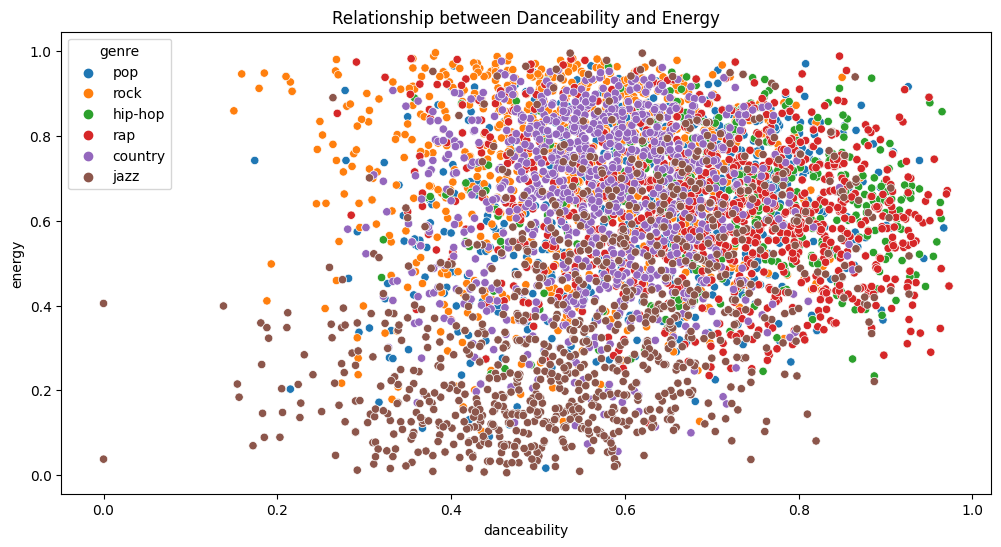

In [92]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='danceability', y='energy', hue='genre', data=combined_df)
plt.title('Relationship between Danceability and Energy')
plt.show()

In [ ]:

# # Search for tracks in the specified genre
# genre = ["rap","rock","hip-hop","pop","latin pop"]

# # Create a list to store the song IDs
# tracks = []
# #df = pd.DataFrame(columns=["track_id", "track_name", "artist_name", "popularity", "duration_ms"])
# # Search for songs using the genre
# import time
# times=10
# offset = 0
# while offset < 100*times:
#         # Fetch 100 songs at a time
#         for genre in genre:
#             tracks.extend(get_genre_songs(genre, offset))
#             offset += 50
    

#         # Sleep for 2 seconds
#         # time.sleep(2)


# tracks_df = pd.DataFrame(data=tracks)

# # Create a dataframe with the song attributes and the genre
# df1 = get_audio_features(tracks_df['track_id'])
# df1["genre"] = genre

# merged_df = pd.merge(tracks_df, df1, on="track_id", how="outer")

In [ ]:
merged_df.shape

In [ ]:
merged_df.head()

**Genre Distinctions and Attributes:**

-How do song attributes like tempo, key, and loudness vary across genres?

-What attributes make a genre unique or distinguishable from others?


In [ ]:
# Remove duplicates based on the track_id column
merged_df.drop_duplicates(subset="track_id", inplace=True)

# Check for missing values
print(merged_df.isnull().sum())


In [ ]:
df=merged_df.copy()

In [ ]:
df.describe()

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

In [ ]:
df.describe()